In [126]:
%pylab inline
import jellyfish

Populating the interactive namespace from numpy and matplotlib


In [153]:
halo_hernquist = np.genfromtxt('../halos_ics/test_hernquist.txt')

In [154]:
def rho_enclosed(pos, mass, rmin=0, rmax=100, nbins=30):
    """
    Compute the density profile of a given galaxy component
    Input:
    ------
    rmin : float
        Minimum radius to compute the density profile (default=0).
    rmax : float
        Maximum radius to compute the density profile (default=300)
    nbins : int
        Number of radial bins to compute the density profile.
    Output:
    ------
    r : numpy 1D array.
        Array with the radial bins.
    rho : numpy array.
        Array with the density in each radial bin.
    """
    r_pos = np.sqrt(pos[:,0]**2 + pos[:,1]**2 + pos[:,2]**2)

    r = np.logspace(0, np.log10(rmax), nbins-1)

    rho = np.zeros(nbins-1)

    # Loop over the radial bins.
    for i in range(1, len(r)):
        indexh = np.where((r_pos<r[i]) & (r_pos>r[i-1]))[0]
        rho[i-1]=(3*(len(indexh)*mass[0]))/(4*np.pi*r[i]**3)
    return r, rho

In [155]:
r, rho = rho_enclosed(np.array([halo_hernquist[:,0], halo_hernquist[:,1], halo_hernquist[:,2]]).T,
                      halo_hernquist[:,3])

(0, 100)

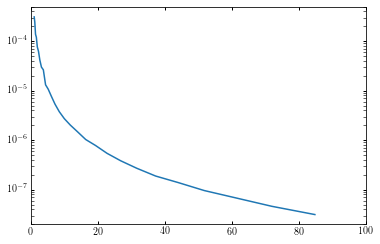

In [156]:
semilogy(r, rho)
xlim(0, 100)

In [160]:
def hernquist_density(M, r, a):
    return M*a / (r*(r+a)**3.)

In [161]:
rho_analytic = hernquist_density(1, r, 10)

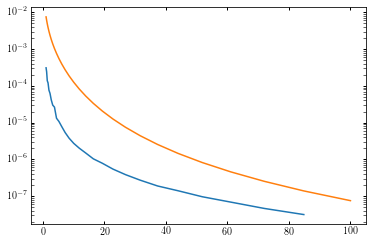

In [162]:
semilogy(r, rho)
semilogy(r, rho_analytic)